# **Ejercicios de pair programming Módulo 3 Sprint 1**
## **Regresión Lineal: Lección 1. Intro Machine Learning**
---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (20,20)
pd.options.display.max_columns = None 

Empezamos una nueva lección, y este es el momento de poner en práctica los conocimientos adquiridos sobre la Regresión Lineal Simple I. Para ello os vamos a pedir que por vuestra cuenta busqueis un dataset que os guste, por ejemplo de Kaggle o de donde queráis extraerlo. De forma que vamos a probar a realizar ajustes lineales con el fin de predecir alguna de sus variables. Este dataset será el que iremos usando a lo largo de todas las sesiones de pairprogramming de regresión lineal.  

>Se ruega a la hora de realizar la entrega que incluyais el conjunto de datos que hayais decidido emplear para estos ejercicios.  

**Objetivos**  

Los objetivos de hoy son:  

1. Buscar un conjunto de datos a analizar:  

    - Es necesario que el conjunto de datos a analizar tenga variables numéricas y categóricas, primando que haya más de una variable de tipo numérico. Ya que tambien se utilizarán serán útiles a la hora de realizar predicciones en las clases de regresión lineal múltiple. Así mismo se recomienda que los datasets esten ligeramente limpios para facilitar los análisis.

In [18]:
df = pd.read_csv("datos/soci_econ_country_profiles.csv", index_col = 0)
df.head(2)

,country,Region,Surface area (km2),Population in thousands (2017),"Population density (per km2, 2017)","Sex ratio (m per 100 f, 2017)",GDP: Gross domestic product (million current US$),"GDP growth rate (annual %, const. 2005 prices)",GDP per capita (current US$),Economy: Agriculture (% of GVA),Economy: Industry (% of GVA),Economy: Services and other activity (% of GVA),Employment: Agriculture (% of employed),Employment: Industry (% of employed),Employment: Services (% of employed),Unemployment (% of labour force),Labour force participation (female/male pop. %),Agricultural production index (2004-2006=100),Food production index (2004-2006=100),International trade: Exports (million US$),International trade: Imports (million US$),International trade: Balance (million US$),"Balance of payments, current account (million US$)",Population growth rate (average annual %),Urban population (% of total population)_x,Urban population growth rate (average annual %),"Fertility rate, total (live births per woman)","Population age distribution (0-14 / 60+ years, %)",International migrant stock (000/% of total pop.),Refugees and others of concern to UNHCR (in thousands),Infant mortality rate (per 1000 live births,Health: Total expenditure (% of GDP),Health: Physicians (per 1000 pop.),Education: Government expenditure (% of GDP),Education: Primary gross enrol. ratio (f/m per 100 pop.),Education: Secondary gross enrol. ratio (f/m per 100 pop.),Education: Tertiary gross enrol. ratio (f/m per 100 pop.),Seats held by women in national parliaments %,Mobile-cellular subscriptions (per 100 inhabitants),Mobile-cellular subscriptions (per 100 inhabitants).1,Individuals using the Internet (per 100 inhabitants),Threatened species (number),Forested area (% of land area),CO2 emission estimates (million tons/tons per capita),"Energy production, primary (Petajoules)",Energy supply per capita (Gigajoules),"Pop. using improved drinking water (urban/rural, %)","Pop. using improved sanitation facilities (urban/rural, %)",Net Official Development Assist. received (% of GNI),Quality Of Life Index,Purchasing Power Index,Safety Index,Health Care Index,Cost of Living,Property price to income ratio,Traffic commute time index,Pollution index,Climate index,Gross Rental Yield City Center,Gross Rental Yield Outside Center,Property Price to Rent Ratio City Center,Property Price to Rent Ratio Outside Center,Mortgate as percentage of income,Affordability Index,Cost Of Living Index,Rent Index,Cost Of Living Plus Rent Index,Grocery Index,Restaurant Price Index,Local Purchasing Power Index,Access to electricity (% of population),Adjusted net national income per capita (constant 2010 US$),Age dependency ratio (% of working-age population),"Air transport, freight (million ton-km)","Air transport, passengers carried",Commercial service exports (current US$),Commercial service imports (current US$),Consumer price index (2010 = 100),Current account balance (% of GDP),Current health expenditure (% of GDP),Exports of goods and services (% of GDP),Gross domestic savings (% of GDP),High-technology exports (current US$),Human capital index (HCI) (scale 0-1),Imports of goods and services (% of GDP),"Inflation, consumer prices (annual %)","Life expectancy at birth, female (years)","Life expectancy at birth, male (years)","Life expectancy at birth, total (years)",Military expenditure (% of GDP),"Population, female","Population, male",Tax revenue (% of GDP),"Taxes on income, profits and capital gains (% of revenue)",Urban population (% of total population)_y
0,Argentina,SouthAmerica,2780400,44271,16.2,95.9,632343,2.4,14564.5,6.0,27.8,66.2,2.0,24.8,73.1,6.5,48.6/74.4,119,119,57733,55610,2124,-15944,1.0,91.8,1.0,2.3,24.9/15.4,2086.3/4.8,5.0,13.7,4.8,3.8,5.3,109.8/110.2,110.3/103.4,102.9/63.5,38.9,143.9,69.4,256,10.0,204.0/4.7,3167,85,99.0/100.0,96.2/98.3,0.01,-99,139.59,58.40,37.37,73.30,52.57,12.07,37.95,53.33,90.67,3.77,3.90,26.53,25.64,333.23,0.30,52.57,13.92,34.05,44.06,50.37,58.40,100.0,909

2. Explicar los datos y las variables disponibles en el conjunto de datos seleccionado:  
    - Esto se hace para que comprendais mejor los datos con los que estais trabajando.   
    - Realizar un EDA sencillo para la variable dependiente y las variables independientes.  


!!!!!!!!!!!!!!!!!!!!           EXPLICACIÓN DATOS

- Seleccionamos nuestra variable respuesta: Restaurant Price Index.

In [19]:
# seleccionamos las columnas que consideramos que  nos pueden resultar útiles ya que el dataset es demasiado extenso para ser manejable completo.
# En un primer momento nos quedamos tan solo con las columnas que por "sentido común" podrían estar relacionadas con nuestra variable respuesta. 
lista_columnas = ['country', 'Region', 'Population in thousands (2017)', 'GDP per capita (current US$)',
                   'Employment: Agriculture (% of employed)', 'Employment: Industry (% of employed)', 'Employment: Services (% of employed)', 'Population age distribution (0-14 / 60+ years, %)',
                    'International migrant stock (000/% of total pop.)', 'Refugees and others of concern to UNHCR (in thousands)', 'Education: Government expenditure (% of GDP)', 'Quality Of Life Index', 
                    'Purchasing Power Index', 'Safety Index', 'Cost of Living', 'Rent Index', 'Grocery Index', 'Restaurant Price Index', 'Adjusted net national income per capita (constant 2010 US$)',
                     'Consumer price index (2010 = 100)', 'Human capital index (HCI) (scale 0-1)', 'Inflation, consumer prices (annual %)', 'Urban population (% of total population)_y']
df_country = df.filter(lista_columnas, axis=1)

In [20]:
nuevas_columnas = {col: col.replace(" ", "_").lower() for col in df_country.columns}
df_country.rename(columns = nuevas_columnas, inplace = True)

In [21]:
df_country_num = df_country.select_dtypes(include=np.number)
df_country_num.sample()

,population_in_thousands_(2017),gdp_per_capita_(current_us$),employment:_agriculture_(%_of_employed),employment:_industry_(%_of_employed),employment:_services_(%_of_employed),quality_of_life_index,purchasing_power_index,safety_index,cost_of_living,rent_index,grocery_index,restaurant_price_index,adjusted_net_national_income_per_capita_(constant_2010_us$),consumer_price_index_(2010_=_100),human_capital_index_(hci)_(scale_0-1),"inflation,_consumer_prices_(annual_%)",urban_population_(%_of_total_population)_y
5,3507,4265.0,18.0,30.4,51.7,139.14,51.29,59.03,35.05,6.22,29.76,24.22,5061.666904,102.851586,0.618,0.810133,47.876


In [22]:
correl = df_country_num.corr(method='spearman')
correl

,population_in_thousands_(2017),gdp_per_capita_(current_us$),employment:_agriculture_(%_of_employed),employment:_industry_(%_of_employed),employment:_services_(%_of_employed),quality_of_life_index,purchasing_power_index,safety_index,cost_of_living,rent_index,grocery_index,restaurant_price_index,adjusted_net_national_income_per_capita_(constant_2010_us$),consumer_price_index_(2010_=_100),human_capital_index_(hci)_(scale_0-1),"inflation,_consumer_prices_(annual_%)",urban_population_(%_of_total_population)_y
population_in_thousands_(2017),1.000000,-0.356936,0.343351,-0.058540,-0.279261,-0.359775,-0.207390,-0.501957,-0.281161,-0.176142,-0.148191,-0.358463,-0.343590,0.487912,-0.307680,0.416392,-0.137377
gdp_per_capita_(current_us$),-0.356936,1.000000,-0.825057,-0.337839,0.765550,0.713182,0.840518,0.466031,0.879971,0.836059,0.805916,0.882318,0.986538,-0.543819,0.794212,-0.589194,0.588838
employment:_agriculture_(%_of_employed),0.343351,-0.825057,1.000000,0.275443,-0.828677,-0.579413,-0.714177,-0.384672,-0.783302,-0.743852,-0.693129,-0.814898,-0.805454,0.435156,-0.649493,0.436576,-0.708130
employment:_industry_(%_of_employed),-0.058540,-0.337839,0.275443,1.000000,-0.644879,-0.138167,-0.249611,0.069794,-0.457133,-0.373398,-0.476492,-0.428786,-0.306384,0.103631,-0.217952,0.193708,-0.360683
employment:_services_(%_of_employed),-0.279261,0.765550,-0.828677,-0.644879,1.000000,0.585389,0.649374,0.237636,0.796342,0.675706,0.705539,0.823010,0.754379,-0.451038,0.639271,-0.393846,0.692741
quality_of_life_index,-0.359775,0.713182,-0.579413,-0.138167,0.585389,1.000000,0.715771,0.444342,0.600250,0.483337,0.474277,0.685322,0.775321,-0.653846,0.653022,-0.455540,0.217662
purchasing_power_index,-0.207390,0.840518,-0.714177,-0.249611,0.649374,0.715771,1.000000,0.446618,0.741572,0.731789,0.686011,0.722563,0.843452,-0.454716,0.630676,-0.548031,0.459644
safety_index,-0.501957,0.466031,-0.384672,0.069794,0.237636,0.444342,0.446618,1.000000,0.358317,0.346840,0.289329,0.311216,0.473861,-0.449730,0.504510,-0.551700,0.136335
cost_of_living,-0.281161,0.879971,-0.783302,-0.457133,0.796342,0.600250,0.741572,0.358317,1.000000,0.876369,0.950099,0.911919,0.868956,-0.524130,0.733198,-0.586172,0.632049
rent_index,-0.176142,0.836059,-0.743852,-0.373398,0.675706,0.483337,0.731789,0.346840,0.876369,1.000000,0.840410,0.832394,0.811159,-0.285992,0.654609,-0.423082,0.607569


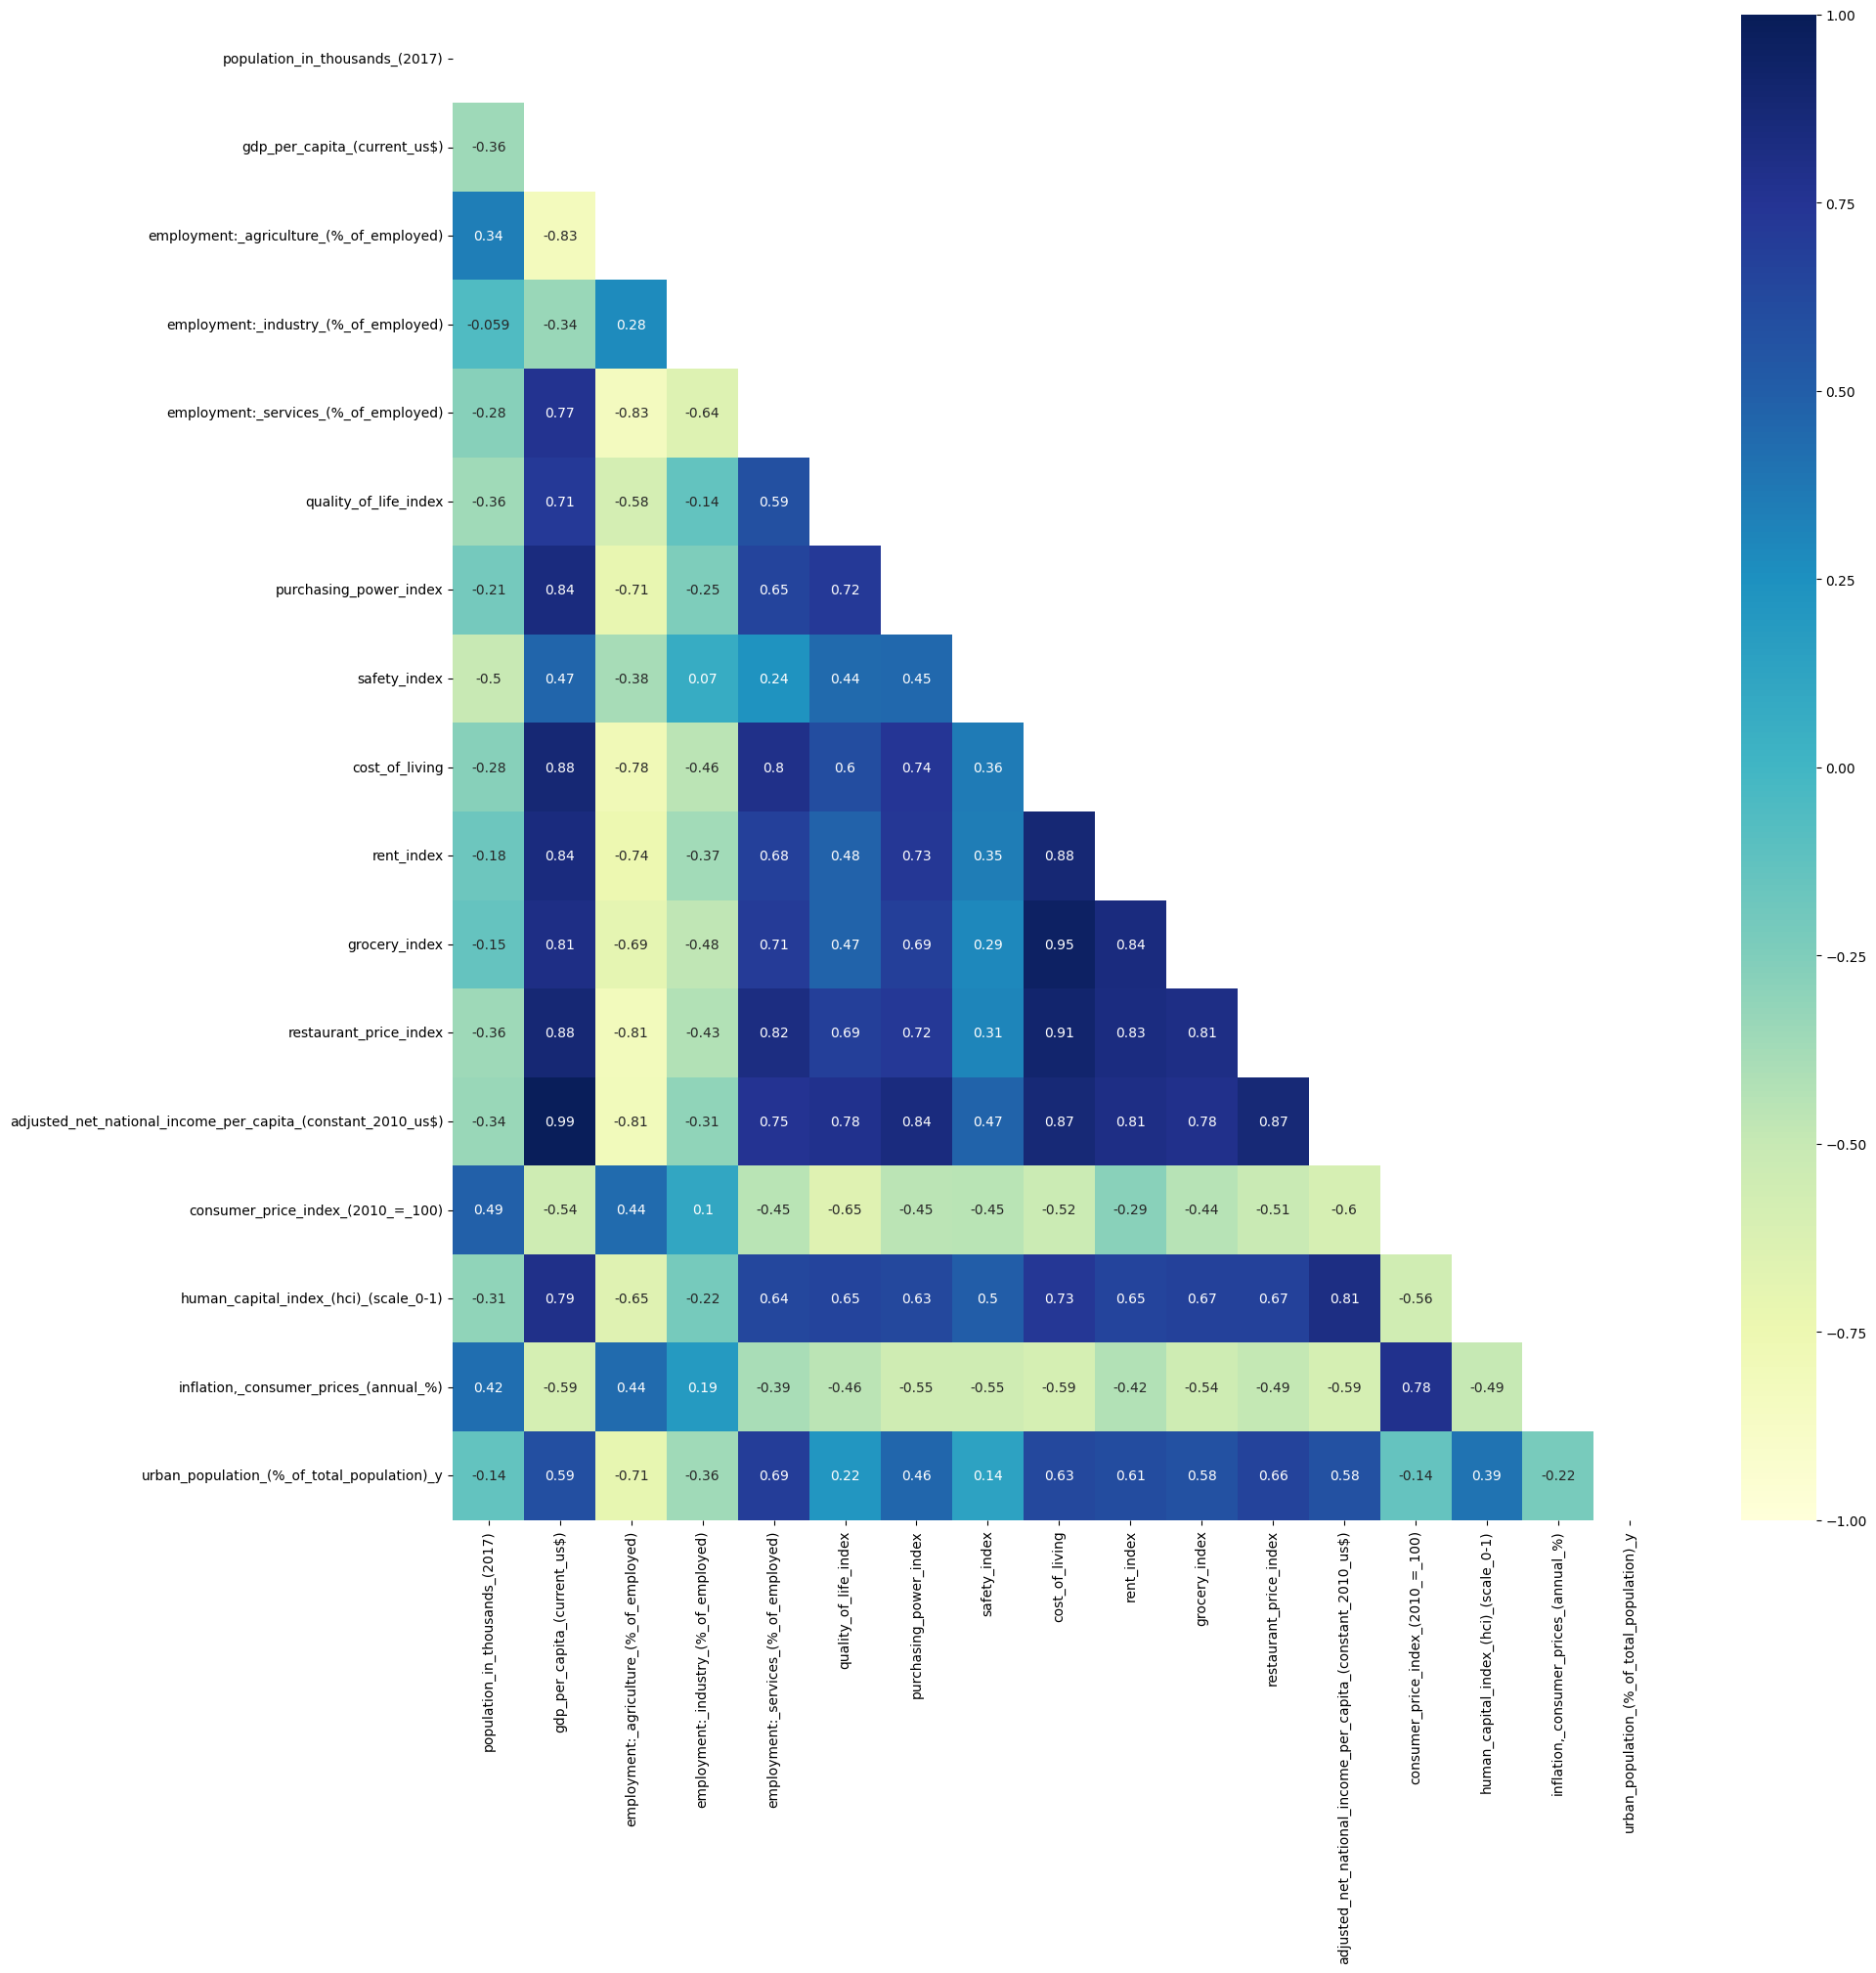

In [23]:
# sacamos el heatmap
mask = np.triu(np.ones_like(correl, dtype = np.bool_))

sns.heatmap(correl, 
           cmap = "YlGnBu", 
            mask = mask,
           annot = True,
           vmin= -1,
           vmax= 1);

In [24]:
# en vista de que algunas de las variables tienen una correlación muy alta y para no complicar en exceso el tratamiento y análisis de los datos con variables redundantes (correlación superior a 0,88) procedemos a eliminar algunas columnas 
# De entre las columnas redundantes eliminamos aquellas que tienen menor correlación con nuestra variable respuesta 
df_country.drop(columns=['adjusted_net_national_income_per_capita_(constant_2010_us$)', 'grocery_index', 'gdp_per_capita_(current_us$)', 'rent_index'], inplace=True)
df_country_num = df_country.select_dtypes(include=np.number)
correl = df_country_num.corr(method='spearman')

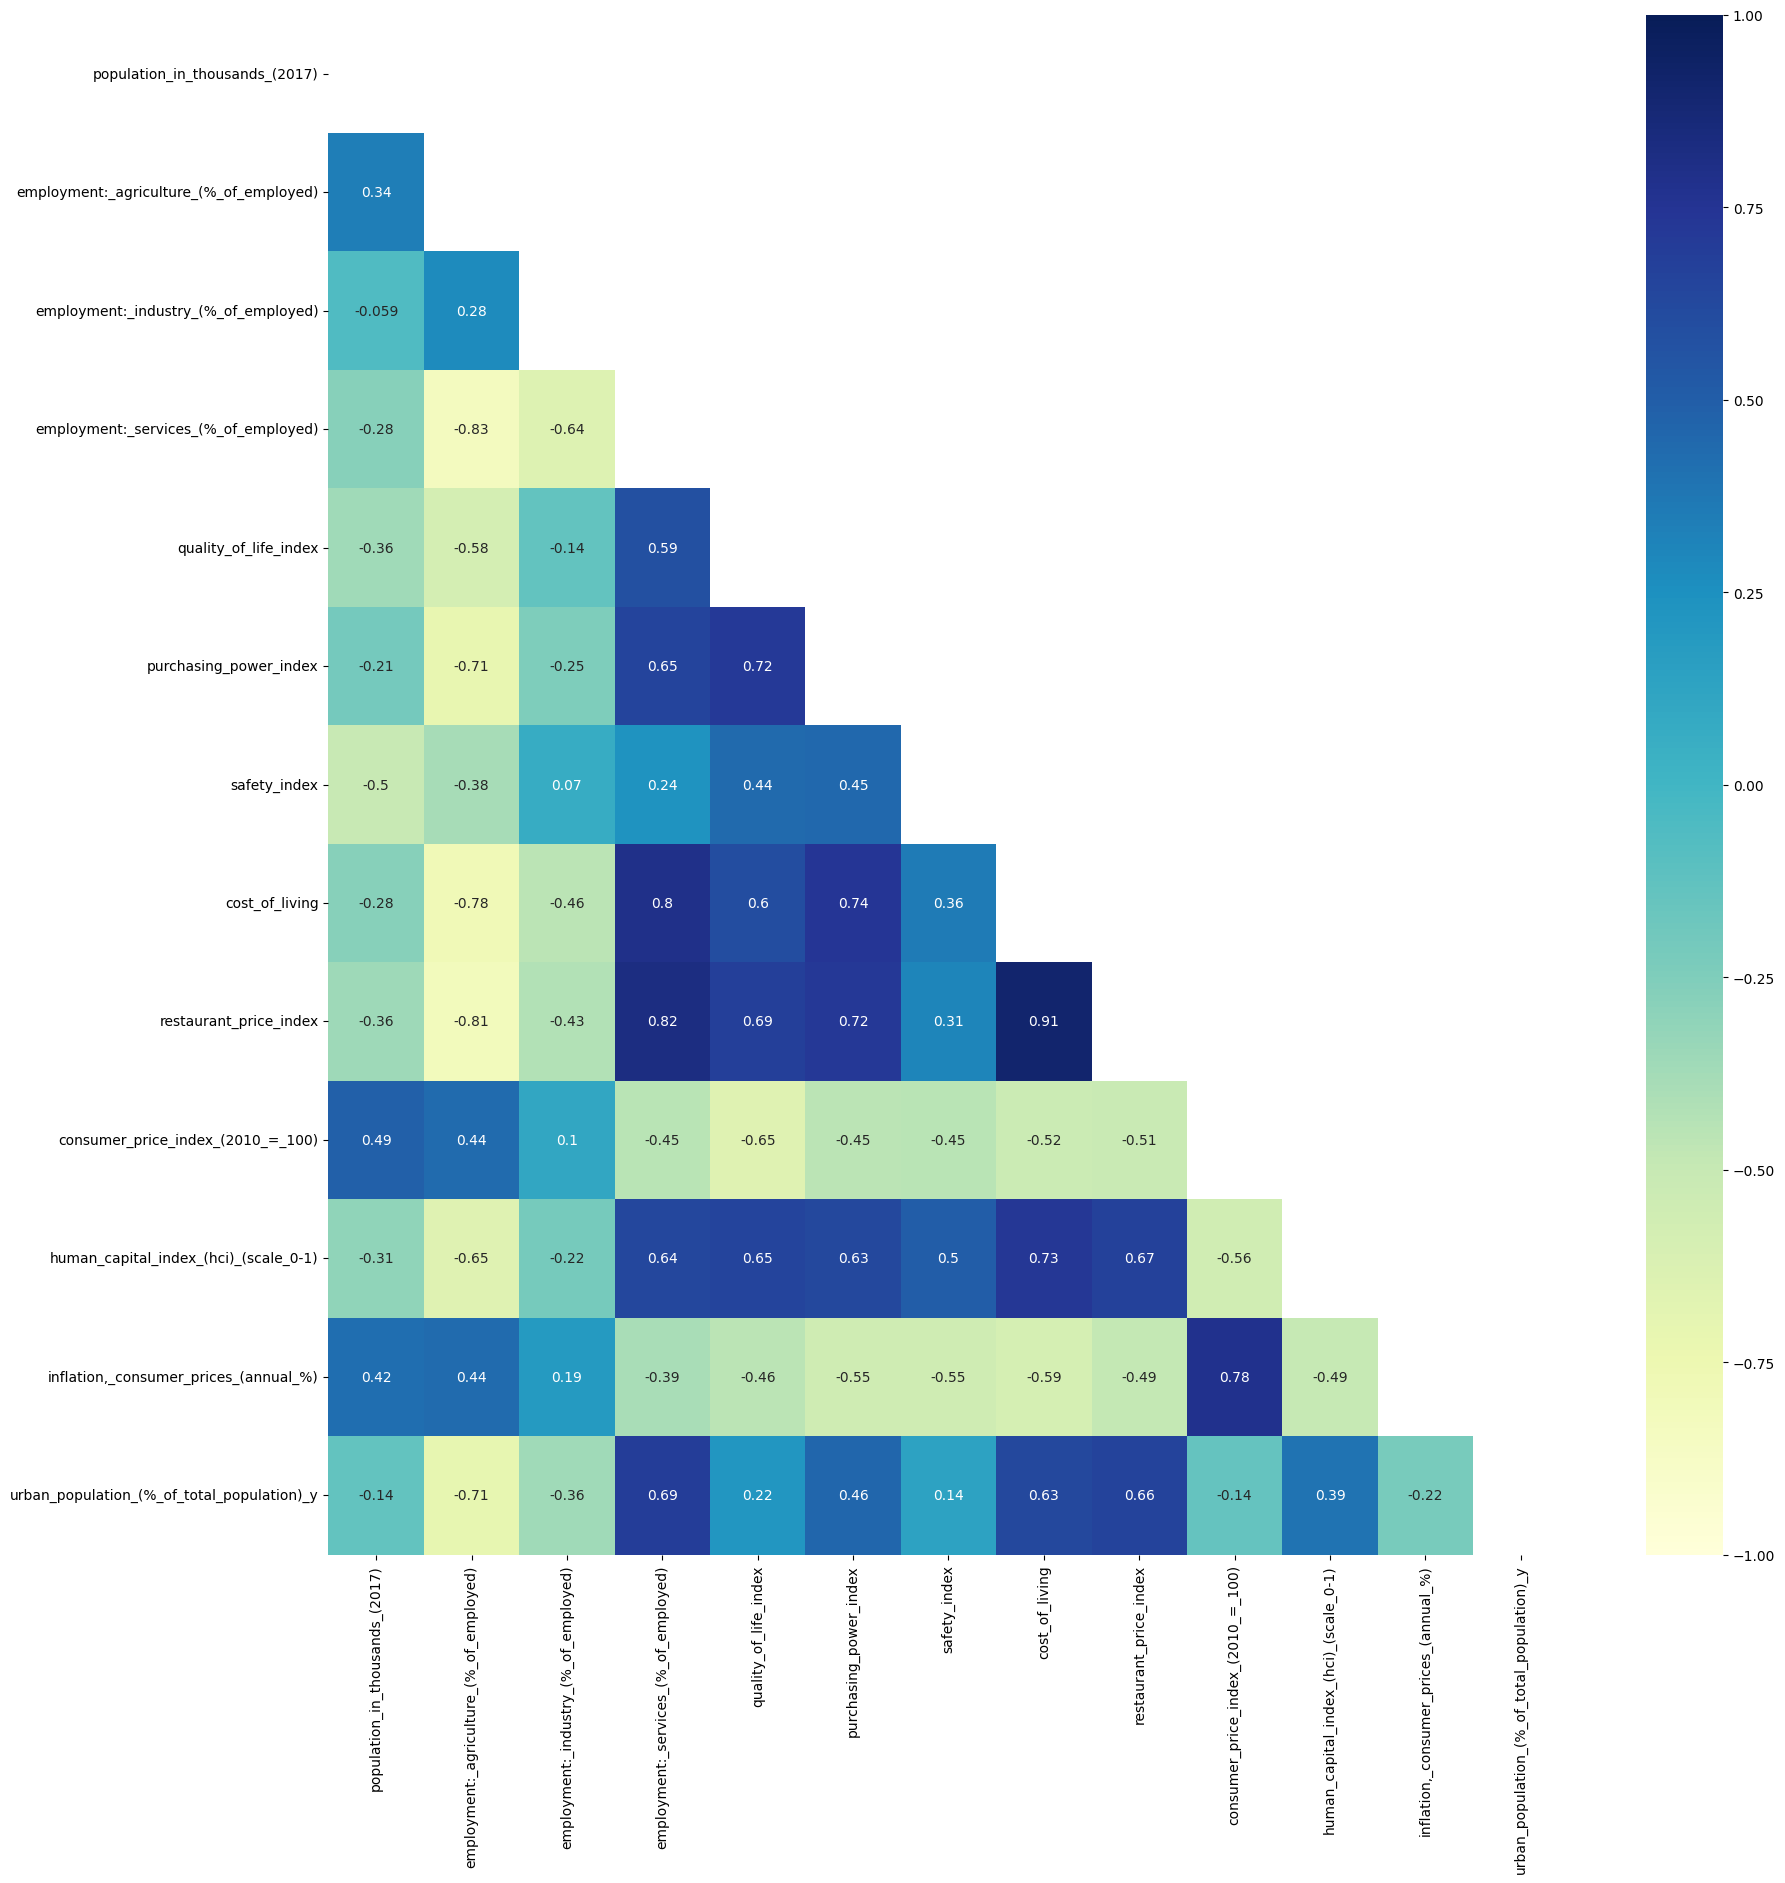

In [25]:
# sacamos el heatmap
mask = np.triu(np.ones_like(correl, dtype = np.bool_))

sns.heatmap(correl, 
           cmap = "YlGnBu", 
            mask = mask,
           annot = True,
           vmin= -1,
           vmax= 1);

In [26]:
def explorar_df(dataframe, nombre = ''):
    """Esta función realiza la exploración inicial de un dataframe dado:
            - Muestra las 5 primeras filas
            - Muestra las 5 últimas filas
            - Muestra 10 filas aleatorias
            - Indica el nº de filas y columnas
            - Muestra el resultado del método .info()
            - Indica el número de nulos por columna en valor absoluto y porcentaje
            - Indica el nº de filas duplicadas. En caso de que no pueda realizar la comprobación muestra un error
            - Muestra los principales estadísticos tanto de las columnas numéricas (si las hay) como de las categóricas (si las hay)
            - Muestra el nombre de las columnas
            - Indica el numero de valores distintos de cada columna y muestra los valores cuando sean 15 o menos          
        Parámetros:
            - dataframe (pandas.core.frame.DataFrame): dataframe que se requiere explorar
            - nombre (str): nombre del dataframe a explorar. Parámetro por defecto con valor '' para que si n o se le quiere poner un nombre al dataframe
              la exploración pueda continuar.
        Return: None.
    """
    print(f'EXPLORACIÓN DEL DATAFRAME {nombre.upper()}')
    print('---------------------------------------------------------------------------')
    print(f'Las primeras 5 filas del dataframe {nombre} son:')
    display(dataframe.head())
    print('---------------------------------------------------------------------------')
    print(f'Las últimas 5 filas del dataframe {nombre} son:')
    display(dataframe.tail())
    print('---------------------------------------------------------------------------')
    print(f'A comntinuación se muestran 10 filas aleatorias del dataframe {nombre}:')
    display(dataframe.sample(10))
    print('---------------------------------------------------------------------------')
    print(f'El dataframe {nombre} tiene {dataframe.shape[0]} filas y {dataframe.shape[1]} columnas')
    print('---------------------------------------------------------------------------')
    print('A continuación el resultado del método .info() incluyendo los tipos de dato de cada columna:')
    dataframe.info()
    print('---------------------------------------------------------------------------')
    print('El número de nulos por columna en valor absoluto y porcentaje es:')
    for i, col in enumerate(dataframe.isnull().sum()):
        print(f'{dataframe.isnull().sum().index[i]}: nº de nulos: {col}. % de nulos: {round(col/dataframe.shape[0]*100, 2)} %')
    print('---------------------------------------------------------------------------')
    try:
        print(f'El nº de filas duplicadas del dataframe {nombre} es: {df.duplicated().sum()}')
    except:
        print(f'Ha ocurrido un error. No se ha podido comprobar si el dataframe {nombre} tiene filas duplicdas')
    print('---------------------------------------------------------------------------')
    if dataframe.select_dtypes(include=np.number).shape[1] != 0:
        print(f'Los principales estadísticos de las columnas numéricas son:')
        display(dataframe.describe().T)
    print('---------------------------------------------------------------------------')
    if dataframe.select_dtypes(exclude=np.number).shape[1] != 0:
        print(f'Los principales estadísticos de las columnas categóricas son:')
        display(dataframe.describe(include=object).T)
    print('---------------------------------------------------------------------------')
    print(f'El dataframe {nombre} tiene las siguientes columnas: \n{dataframe.columns}')
    print('---------------------------------------------------------------------------')
    print('El numero de valores distintos de cada columna es:')
    for col in dataframe.columns:
        if len(dataframe[col].value_counts()) > 15:
            print(f'{col}: {len(dataframe[col].value_counts())}')
        else:
            print(f'{col}: {len(dataframe[col].value_counts())}')
            print(f'Los valores únicos de la columna "{col}" son: {dataframe[col].unique()}')

In [27]:
explorar_df(df_country, 'Socio-Economic Country Profile')

EXPLORACIÓN DEL DATAFRAME SOCIO-ECONOMIC COUNTRY PROFILE
---------------------------------------------------------------------------
Las primeras 5 filas del dataframe Socio-Economic Country Profile son:


,country,region,population_in_thousands_(2017),employment:_agriculture_(%_of_employed),employment:_industry_(%_of_employed),employment:_services_(%_of_employed),"population_age_distribution_(0-14_/_60+_years,_%)",international_migrant_stock_(000/%_of_total_pop.),refugees_and_others_of_concern_to_unhcr_(in_thousands),education:_government_expenditure_(%_of_gdp),quality_of_life_index,purchasing_power_index,safety_index,cost_of_living,restaurant_price_index,consumer_price_index_(2010_=_100),human_capital_index_(hci)_(scale_0-1),"inflation,_consumer_prices_(annual_%)",urban_population_(%_of_total_population)_y
0,Argentina,SouthAmerica,44271,2.0,24.8,73.1,24.9/15.4,2086.3/4.8,5.0,5.3,139.59,58.40,37.37,52.57,50.37,112.887108,0.611,NaN,91.749
1,Australia,Oceania,24451,2.7,21.2,76.1,19.0/21.0,6763.7/28.2,58.2,5.2,176.54,101.94,57.58,80.66,77.12,115.686785,0.803,1.948647,85.904
2,Austria,WesternEurope,8736,4.7,25.6,69.7,14.1/25.1,1492.4/17.5,166.4,5.5,190.37,95.66,80.75,71.52,66.94,113.999737,0.793,2.081269,58.094
3,Belarus,EasternEurope,9468,9.6,32.0,58.4,16.7/21.3,1082.9/11.4,7.9,4.9,119.23,36.43,77.74,33.84,37.60,NaN,NaN,6.031837,78.134
4,Belgium,WesternEurope,11429,1.2,21.2,77.6,17.1/24.6,1387.9/12.3,63.8,6.6,160.52,91.02,55.49,75.36,82.34,113.128903,0.757,2.125971,97.961


---------------------------------------------------------------------------
Las últimas 5 filas del dataframe Socio-Economic Country Profile son:


,country,region,population_in_thousands_(2017),employment:_agriculture_(%_of_employed),employment:_industry_(%_of_employed),employment:_services_(%_of_employed),"population_age_distribution_(0-14_/_60+_years,_%)",international_migrant_stock_(000/%_of_total_pop.),refugees_and_others_of_concern_to_unhcr_(in_thousands),education:_government_expenditure_(%_of_gdp),quality_of_life_index,purchasing_power_index,safety_index,cost_of_living,restaurant_price_index,consumer_price_index_(2010_=_100),human_capital_index_(hci)_(scale_0-1),"inflation,_consumer_prices_(annual_%)",urban_population_(%_of_total_population)_y
61,United Arab Emirates,WesternAsia,9400,3.5,21.1,75.4,13.9/2.4,8095.1/88.4,1.3,-99,139.27,116.77,79.34,67.98,63.92,113.302921,0.659,1.966826,86.248
62,United Kingdom,NorthernEurope,66182,1.2,18.4,80.4,17.7/23.9,8543.1/13.2,151.7,5.7,172.87,96.85,58.81,69.49,76.84,114.943592,0.781,2.557756,83.143
63,United States of America,NorthernAmerica,324460,1.5,17.2,81.3,18.9/21.5,46627.1/14.5,616.5,5.4,179.73,123.17,51.24,75.42,70.02,112.411557,0.762,2.130110,82.058
64,Venezuela (Bolivarian Republic of),SouthAmerica,31977,11.9,26.8,61.3,27.6/9.9,1404.4/4.5,174.2,...,0.00,3.35,14.72,38.30,37.34,NaN,NaN,NaN,88.183
65,Vietnam,South-easternAsia,95541,41.8,22.9,35.2,23.1/11.1,72.8/0.1,11.0,5.7,36.12,24.77,47.04,40.11,20.46,153.631652,0.666,3.520257,35.213


---------------------------------------------------------------------------
A comntinuación se muestran 10 filas aleatorias del dataframe Socio-Economic Country Profile:


,country,region,population_in_thousands_(2017),employment:_agriculture_(%_of_employed),employment:_industry_(%_of_employed),employment:_services_(%_of_employed),"population_age_distribution_(0-14_/_60+_years,_%)",international_migrant_stock_(000/%_of_total_pop.),refugees_and_others_of_concern_to_unhcr_(in_thousands),education:_government_expenditure_(%_of_gdp),quality_of_life_index,purchasing_power_index,safety_index,cost_of_living,restaurant_price_index,consumer_price_index_(2010_=_100),human_capital_index_(hci)_(scale_0-1),"inflation,_consumer_prices_(annual_%)",urban_population_(%_of_total_population)_y
22,Greece,SouthernEurope,11160,12.9,15.0,72.1,14.2/26.5,1242.5/11.3,94.7,...,148.32,58.24,59.68,55.87,54.62,101.059873,0.681,1.121235,78.724
43,Qatar,WesternAsia,2639,1.2,54.1,44.7,13.9/2.8,1687.6/75.5,1.5,3.6,132.37,111.28,84.30,69.20,72.73,115.858803,0.615,0.394879,99.078
34,Malaysia,South-easternAsia,31624,11.8,27.3,60.9,24.3/9.7,2514.2/8.3,238.6,5.0,51.65,73.34,35.25,40.24,20.87,119.605066,0.622,3.871201,75.447
23,Hungary,EasternEurope,9722,4.3,29.8,65.9,14.3/26.0,449.6/4.6,14.4,4.7,138.82,47.52,61.61,42.77,32.72,114.450017,0.703,2.348243,71.062
6,Brazil,SouthAmerica,209288,15.2,21.5,63.2,21.7/12.6,713.6/0.3,41.1,6.0,96.15,42.38,29.38,53.07,42.33,155.668786,0.560,3.446373,86.309
62,United Kingdom,NorthernEurope,66182,1.2,18.4,80.4,17.7/23.9,8543.1/13.2,151.7,5.7,172.87,96.85,58.81,69.49,76.84,114.943592,0.781,2.557756,83.143
59,Turkey,WesternAsia,80745,19.6,27.5,52.9,25.0/12.0,2964.9/3.8,3006.3,4.8,129.63,55.64,58.91,38.60,26.45,174.968703,0.626,11.144311,74.644
31,Jordan,WesternAsia,9702,2.0,17.8,80.2,35.5/5.7,3112.0/41.0,721.4,-99,117.47,42.27,56.86,59.22,56.19,119.329869,0.562,3.323894,90.747
7,Bulgaria,EasternEurope,7085,6.5,29.4,64.1,14.2/27.7,102.1/1.4,33.7,4.1,138.20,51.40,59.82,36.49,29.56,107.938957,0.676,2.064355,74.669
21,Germany,WesternEurope,82114,1.4,27.5,71.2,13.1/28.0,12005.7/14.9,1052.1,5.0,189.74,124.88,67.97,65.50,62.62,109.352463,0.795,1.509497,77.261


---------------------------------------------------------------------------
El dataframe Socio-Economic Country Profile tiene 66 filas y 19 columnas
---------------------------------------------------------------------------
A continuación el resultado del método .info() incluyendo los tipos de dato de cada columna:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 66 entries, 0 to 65
Data columns (total 19 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   country                                                 66 non-null     object 
 1   region                                                  66 non-null     object 
 2   population_in_thousands_(2017)                          66 non-null     int64  
 3   employment:_agriculture_(%_of_employed)                 66 non-null     float64
 4   employment:_industry_(%_of_employed)                    66 non-n

,count,mean,std,min,25%,50%,75%,max
population_in_thousands_(2017),66.0,86551.363636,238173.608572,1180.000000,7155.000000,18867.000000,65881.500000,1.409517e+06
employment:_agriculture_(%_of_employed),66.0,10.575758,10.981566,0.200000,2.700000,6.000000,14.775000,4.430000e+01
employment:_industry_(%_of_employed),66.0,24.056061,6.194865,14.900000,19.900000,23.850000,27.100000,5.410000e+01
employment:_services_(%_of_employed),66.0,65.356061,12.711462,31.200000,58.675000,67.600000,76.100000,8.490000e+01
quality_of_life_index,66.0,134.090455,42.106991,0.000000,102.685000,141.055000,167.110000,1.903700e+02
purchasing_power_index,66.0,71.386818,29.967676,3.350000,47.707500,70.115000,95.855000,1.380500e+02
safety_index,66.0,60.630455,14.160485,14.720000,52.712500,60.100000,70.770000,8.430000e+01
cost_of_living,66.0,55.273485,20.900261,22.360000,38.375000,49.795000,72.912500,1.220600e+02
restaurant_price_index,66.0,48.807879,24.874263,16.380000,28.382500,43.490000,66.617500,1.198500e+02
consumer_price_index_(2010_=_100),64.0,126.221655,37.173492,98.266862,109.306024,113.284422,126.116948,3.336733e+02


---------------------------------------------------------------------------
Los principales estadísticos de las columnas categóricas son:


,count,unique,top,freq
country,66,66,Argentina,1
region,66,14,EasternEurope,9
"population_age_distribution_(0-14_/_60+_years,_%)",66,66,24.9/15.4,1
international_migrant_stock_(000/%_of_total_pop.),66,66,2086.3/4.8,1
refugees_and_others_of_concern_to_unhcr_(in_thousands),66,66,5.0,1
education:_government_expenditure_(%_of_gdp),66,35,...,6


---------------------------------------------------------------------------
El dataframe Socio-Economic Country Profile tiene las siguientes columnas: 
Index(['country', 'region', 'population_in_thousands_(2017)',
       'employment:_agriculture_(%_of_employed)',
       'employment:_industry_(%_of_employed)',
       'employment:_services_(%_of_employed)',
       'population_age_distribution_(0-14_/_60+_years,_%)',
       'international_migrant_stock_(000/%_of_total_pop.)',
       'refugees_and_others_of_concern_to_unhcr_(in_thousands)',
       'education:_government_expenditure_(%_of_gdp)', 'quality_of_life_index',
       'purchasing_power_index', 'safety_index', 'cost_of_living',
       'restaurant_price_index', 'consumer_price_index_(2010_=_100)',
       'human_capital_index_(hci)_(scale_0-1)',
       'inflation,_consumer_prices_(annual_%)',
       'urban_population_(%_of_total_population)_y'],
      dtype='object')
--------------------------------------------------------------------

In [28]:
df_country.columns

Index(['country', 'region', 'population_in_thousands_(2017)',
       'employment:_agriculture_(%_of_employed)',
       'employment:_industry_(%_of_employed)',
       'employment:_services_(%_of_employed)',
       'population_age_distribution_(0-14_/_60+_years,_%)',
       'international_migrant_stock_(000/%_of_total_pop.)',
       'refugees_and_others_of_concern_to_unhcr_(in_thousands)',
       'education:_government_expenditure_(%_of_gdp)', 'quality_of_life_index',
       'purchasing_power_index', 'safety_index', 'cost_of_living',
       'restaurant_price_index', 'consumer_price_index_(2010_=_100)',
       'human_capital_index_(hci)_(scale_0-1)',
       'inflation,_consumer_prices_(annual_%)',
       'urban_population_(%_of_total_population)_y'],
      dtype='object')

In [31]:
df_country[['population_age_distribution_(0-14_years,_%)','population_age_distribution_(60+_years,_%)']] = df_country['population_age_distribution_(0-14_/_60+_years,_%)'].str.split('/', expand=True)

In [35]:
df_country[['international_migrant_stock_(000)','international_migrant_stock_(%_of_total_pop.)']] = df_country['international_migrant_stock_(000/%_of_total_pop.)'].str.split('/', expand=True)

In [ ]:
df_country.drop()

In [ ]:
for columna in df_country.columns[-4:]:
    df_country[columna] = df_country[columna].apply(lambda dato: float(dato) if type(dato) == object else dato)

In [36]:
df_country.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66 entries, 0 to 65
Data columns (total 23 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   country                                                 66 non-null     object 
 1   region                                                  66 non-null     object 
 2   population_in_thousands_(2017)                          66 non-null     int64  
 3   employment:_agriculture_(%_of_employed)                 66 non-null     float64
 4   employment:_industry_(%_of_employed)                    66 non-null     float64
 5   employment:_services_(%_of_employed)                    66 non-null     float64
 6   population_age_distribution_(0-14_/_60+_years,_%)       66 non-null     object 
 7   international_migrant_stock_(000/%_of_total_pop.)       66 non-null     object 
 8   refugees_and_others_of_concern_to_unhcr_(i

KeyError: "['restaurant_price_index'] not found in axis"

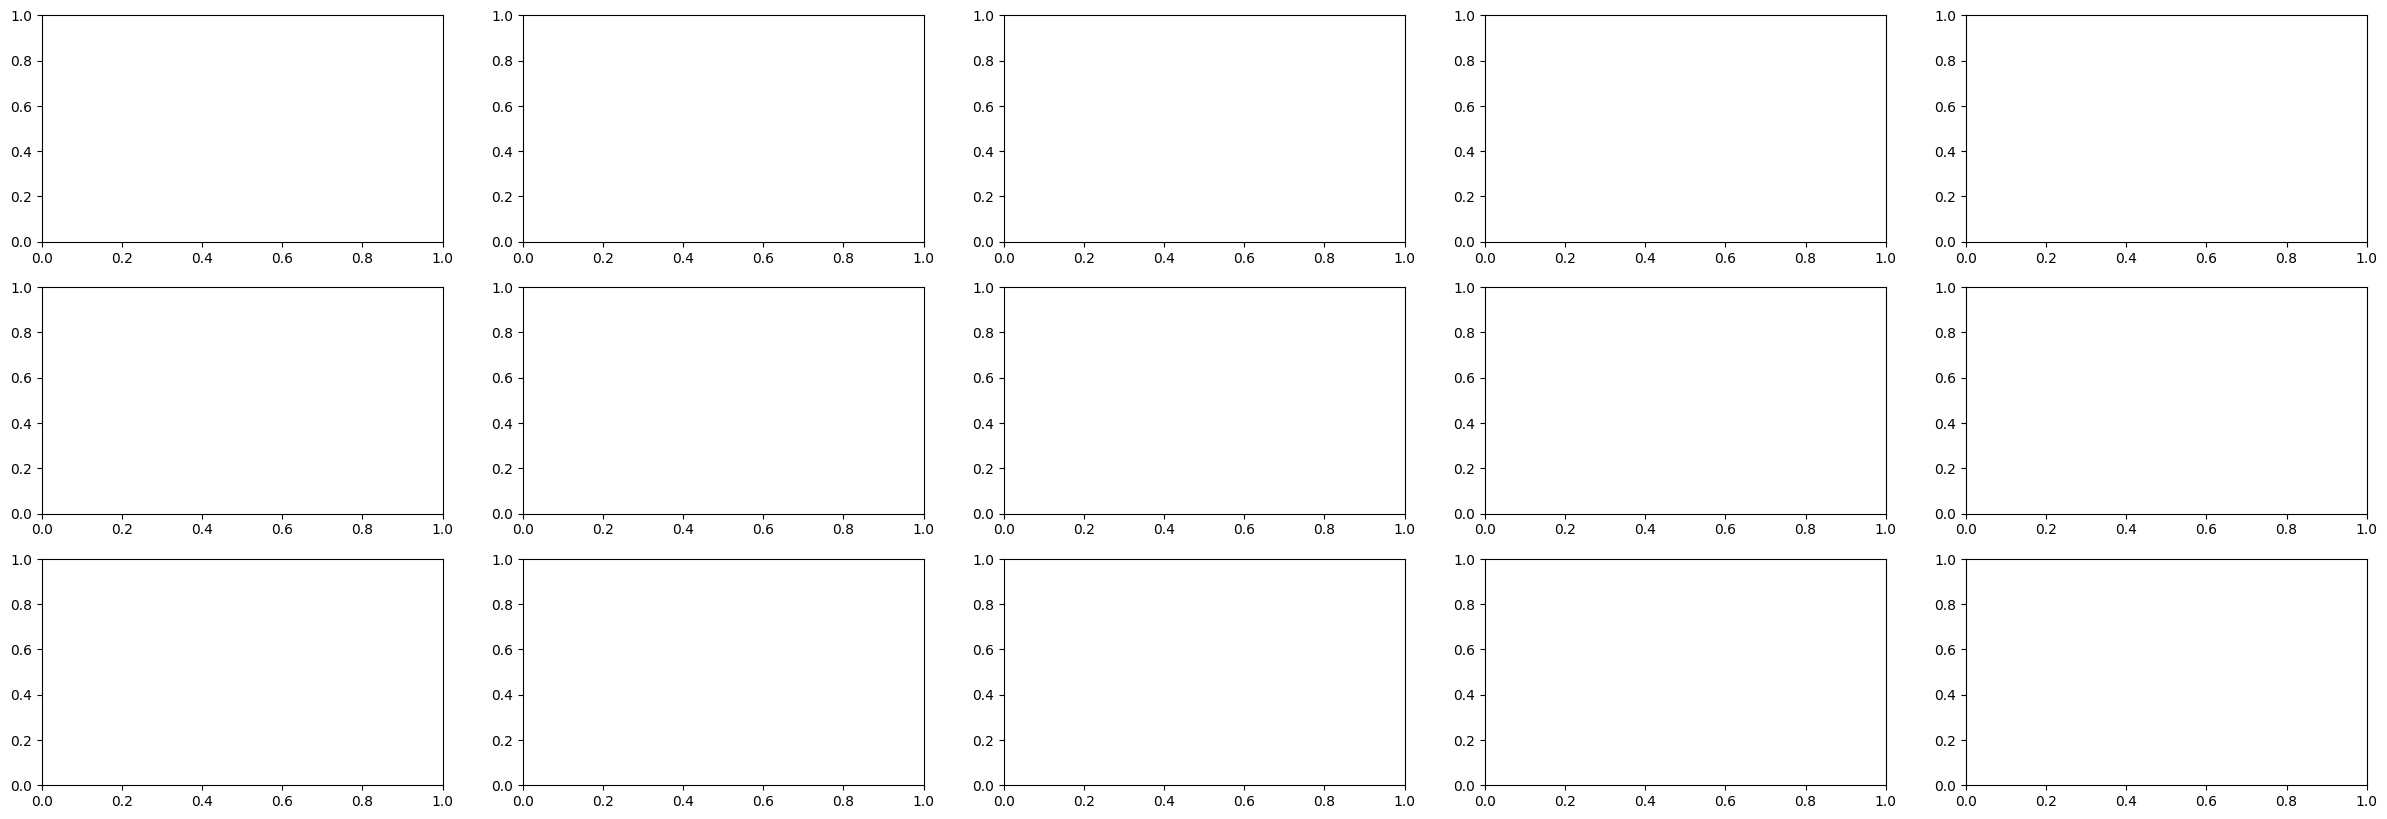

In [33]:


fig, axes = plt.subplots(nrows = 3, ncols = 5, figsize = (30, 10))


axes = axes.flat

df_country_num = df_country_num.drop("restaurant_price_index")

for i, colum in enumerate(df_country_num):
    sns.regplot(
        x = df_country[colum], 
        y = df_country["restaurant_price_index"], 
        color = "gray", 
        marker = ".", 
        scatter_kws = {"alpha": 0.4}, 
        line_kws = {"color": "red", "alpha": 0.7 }, 
        ax = axes[i])
    
    axes[i].set_title(f"Precio vs {colum}", fontsize = 10, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")
    
fig.tight_layout()
fig.delaxes(axes[-1])
fig.delaxes(axes[-2])
fig.delaxes(axes[-3]);

In [ ]:
df_country.to_csv('datos/soci_econ_country_profiles_resumido.csv')